https://www.kaggle.com/isbhargav/guide-to-pytorch-learning-rate-scheduling

In [20]:
import numpy as np # linear algebra
import torch
import matplotlib.pyplot as plt
from torch.optim import lr_scheduler as sched

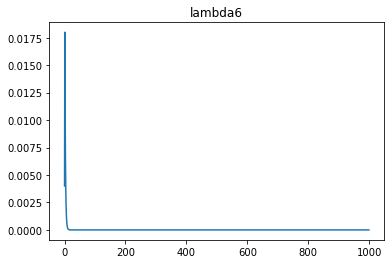

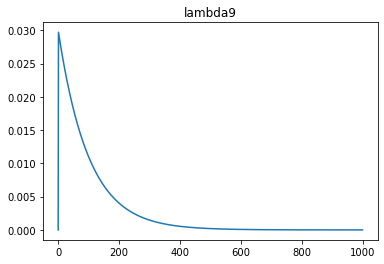

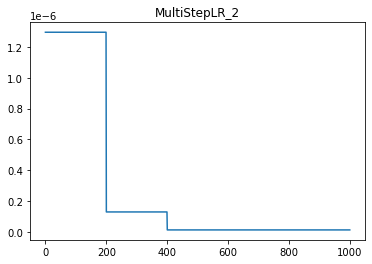

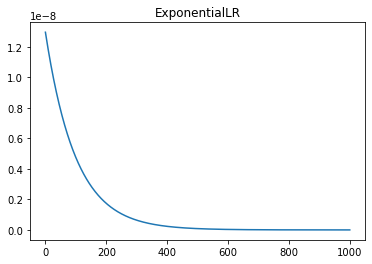

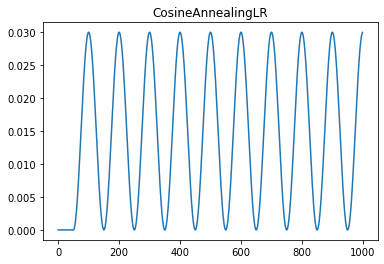

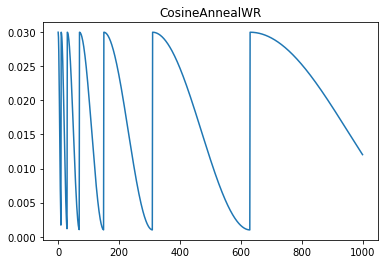

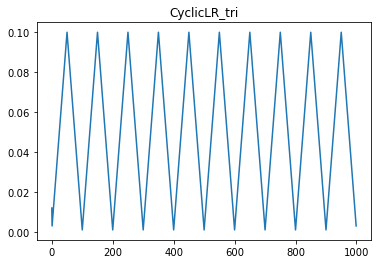

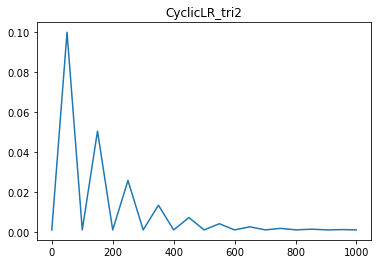

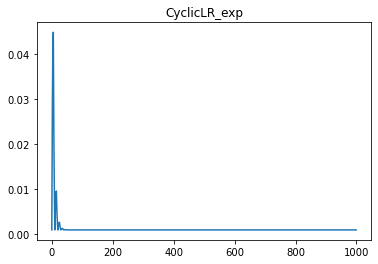

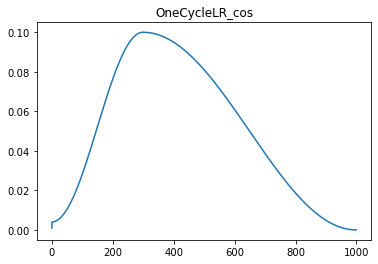

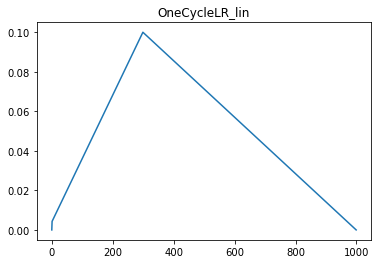

In [66]:
opt = torch.optim.SGD(model.parameters(), lr=0.03)

schedulers = {
    "lambda6":          sched.LambdaLR(opt, lr_lambda=lambda epoch: 0.6 ** epoch),
    "lambda9":          sched.LambdaLR(opt, lr_lambda=lambda epoch: 0.99 ** epoch),
    "MultiStepLR_2":    sched.MultiStepLR(opt, milestones=[200,400]),
    "ExponentialLR":    sched.ExponentialLR(opt, gamma=0.99),
    "CosineAnnealingLR":sched.CosineAnnealingLR(opt, T_max=50, eta_min=0),
    "CosineAnnealWR":   sched.CosineAnnealingWarmRestarts(opt, T_0=10, T_mult=1, eta_min=0.001),
    "CosineAnnealWR":   sched.CosineAnnealingWarmRestarts(opt, T_0=10, T_mult=2, eta_min=0.001, last_epoch=-1),
    "CyclicLR_tri":     sched.CyclicLR(opt, base_lr=0.001, max_lr=0.1, step_size_up=50, mode="triangular"),
    "CyclicLR_tri2":    sched.CyclicLR(opt, base_lr=0.001, max_lr=0.1, step_size_up=50, mode="triangular2"),
    "CyclicLR_exp":     sched.CyclicLR(opt, base_lr=0.001, max_lr=0.1, step_size_up=5, mode="exp_range", gamma=0.85),
    "OneCycleLR_cos":   sched.OneCycleLR(opt, max_lr=0.1, pct_start=0.3, anneal_strategy='cos', steps_per_epoch=100, epochs=10),
    "OneCycleLR_lin":   sched.OneCycleLR(opt, max_lr=0.1, pct_start=0.3, anneal_strategy='linear', steps_per_epoch=100, epochs=10)
}

for name, scheduler in schedulers.items():

    lrs = []
    for i in range(1000):
        lrs.append(opt.param_groups[0]["lr"])
        opt.step()
        scheduler.step()
        
    plt.plot(range(1000), lrs)
    plt.title(name)
    plt.show()